In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, DBSCAN
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

## Why analysis of obesity is important

Obesity analysis is important for identifying health risks like heart disease and diabetes, reducing healthcare costs, and promoting public health initiatives. It helps understand the social and environmental factors influencing obesity and guides early prevention and targeted interventions. Additionally, it informs policies for healthier lifestyles and more equitable access to care.
## LINEAR REGRESSION

In [3]:

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
label_encoder = LabelEncoder()
df["NObeyesdad_encoded"] = label_encoder.fit_transform(df["NObeyesdad"])

# Select numerical features
numerical_features = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
X_numerical = df[numerical_features]

# Select categorical features
categorical_features = ["Gender", "family_history_with_overweight"]
X_categorical = df[categorical_features]

# Combine numerical and categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df["NObeyesdad_encoded"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply OneHotEncoding to categorical features and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)   # One-Hot Encode categorical features
    ])

# Apply preprocessing to the features using a pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

X_train_transformed = sm.add_constant(X_train_transformed)
X_test_transformed = sm.add_constant(X_test_transformed)

linear_model = sm.OLS(y_train, X_train_transformed)
linear_result = linear_model.fit()

print(linear_result.summary())

# Predict on the test data
y_pred = linear_result.predict(X_test_transformed)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Number of observations (n) and predictors (p)
n = X_test_transformed.shape[0]
p = X_test_transformed.shape[1] - 1  # Subtract 1 for the constant term

# Calculate Adjusted R2
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print("Linear Regression with Numerical and Categorical Features using Statsmodels")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)
print("Adjusted R2 Score:", adjusted_r2)

                            OLS Regression Results                            
Dep. Variable:     NObeyesdad_encoded   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     40.20
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           5.44e-59
Time:                        16:24:03   Log-Likelihood:                -3381.3
No. Observations:                1688   AIC:                             6781.
Df Residuals:                    1679   BIC:                             6830.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3003      0.029     44.863      0.0

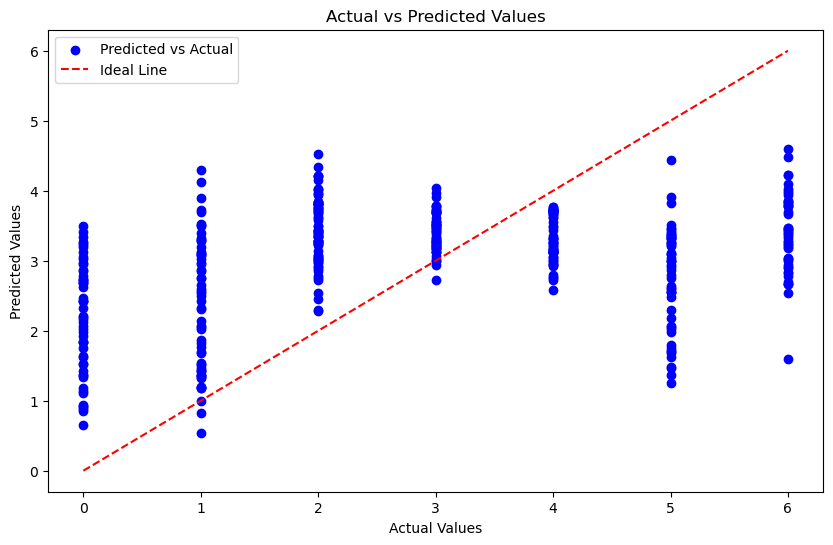

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

The model explains only 12.36% of the variance in the data, indicating that the model's predictive power is quite low. This means that the model is not capturing much of the underlying pattern or relationship within the data.

The model may not capture complex, non-linear relationships between the independent and dependent variables

## POLYNOMIAL REGRESSION

In [6]:
label_encoder = LabelEncoder()
df["NObeyesdad_encoded"] = label_encoder.fit_transform(df["NObeyesdad"])

# Select numerical features
numerical_features = ["Age", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
X_numerical = df[numerical_features]

# Select categorical features
categorical_features = ["Gender", "family_history_with_overweight"]
X_categorical = df[categorical_features]

# Combine numerical and categorical features
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df["NObeyesdad_encoded"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply OneHotEncoding to categorical features and standardize numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Standardize numerical features
        ('cat', OneHotEncoder(), categorical_features)   # One-Hot Encode categorical features
    ])

# Apply preprocessing to the features using a pipeline
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Apply Polynomial Features (Degree = 2) to the numerical features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_transformed[:, :-len(categorical_features)])  # Exclude categorical features
X_test_poly = poly.transform(X_test_transformed[:, :-len(categorical_features)])

# Concatenate the polynomial features with the categorical features (which are already transformed)
X_train_final = np.hstack([X_train_poly, X_train_transformed[:, -len(categorical_features):]])  # Add the transformed categorical features
X_test_final = np.hstack([X_test_poly, X_test_transformed[:, -len(categorical_features):]])  # Same for test data

X_train_final = sm.add_constant(X_train_final)
X_test_final = sm.add_constant(X_test_final)

poly_model = sm.OLS(y_train, X_train_final)
poly_result = poly_model.fit()

print(poly_result.summary())

# Predict on the test data
y_pred = poly_result.predict(X_test_final)

# Compute metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Number of observations (n) and predictors (p)
n = X_test_final.shape[0]
p = X_test_final.shape[1] - 1  # Subtract 1 for the constant term

# Calculate Adjusted R2
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print("Polynomial Regression (Degree 2) with Numerical and Categorical Features using Statsmodels")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)
print("Adjusted R2 Score:", adjusted_r2)

                            OLS Regression Results                            
Dep. Variable:     NObeyesdad_encoded   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     16.79
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           3.35e-85
Time:                        16:24:04   Log-Likelihood:                -3272.4
No. Observations:                1688   AIC:                             6617.
Df Residuals:                    1652   BIC:                             6812.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2434      0.046     26.864      0.0

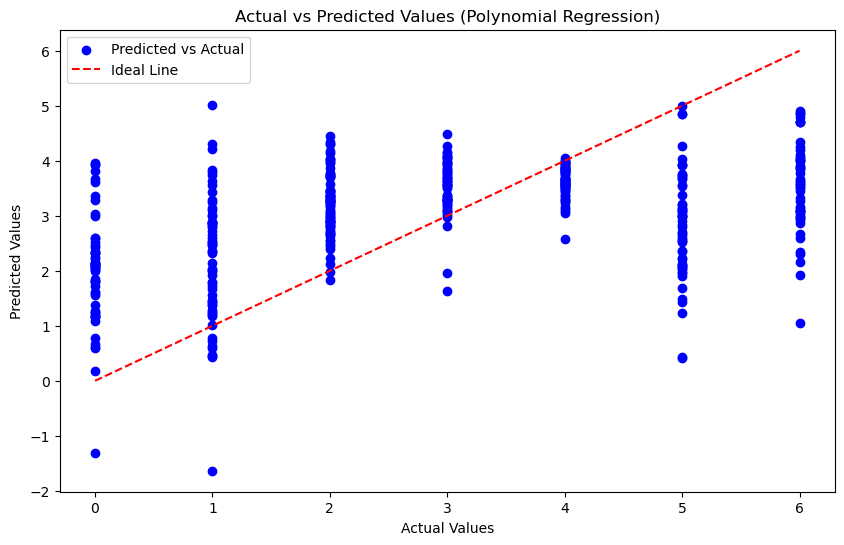

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_58995/402601000.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["NObeyesdad"], y=df["BMI"], palette="Set2")


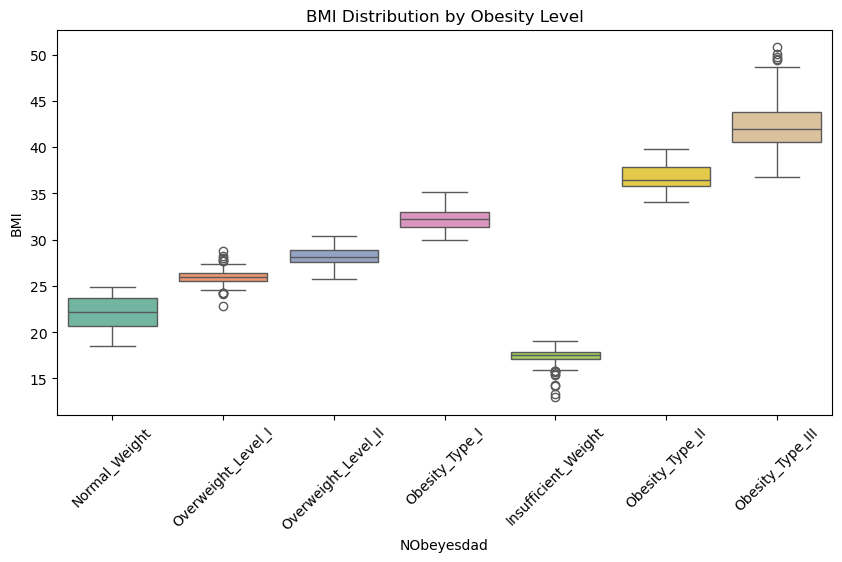

In [8]:
df["BMI"] = df["Weight"] / (df["Height"] ** 2)

plt.figure(figsize=(10,5))
sns.boxplot(x=df["NObeyesdad"], y=df["BMI"], palette="Set2")
plt.title("BMI Distribution by Obesity Level")
plt.xticks(rotation=45)
plt.show()


**Overweight Level 1, Insufficient Weight, and Obesity Type III have noticeable outliers.**

**Overweight Level 1**: Some individuals in this category might have extreme values in weight, height, or other physical features that make them stand out.

**Insufficient Weight:** There could be individuals with unusually low weight values compared to the typical range.

**Obesity Type III:** bold text This category, representing severe obesity, may include extremely high weight values, making them outliers in the dataset.
Higher Range in Obesity Level III:

Individuals in Obesity Type III have the highest weight range among all categories.
The data distribution shows that this group has significantly higher values, often surpassing 100 kg.
Since obesity is classified based on BMI, and BMI depends on both height and weight, those in this group likely have the highest BMI values as well.

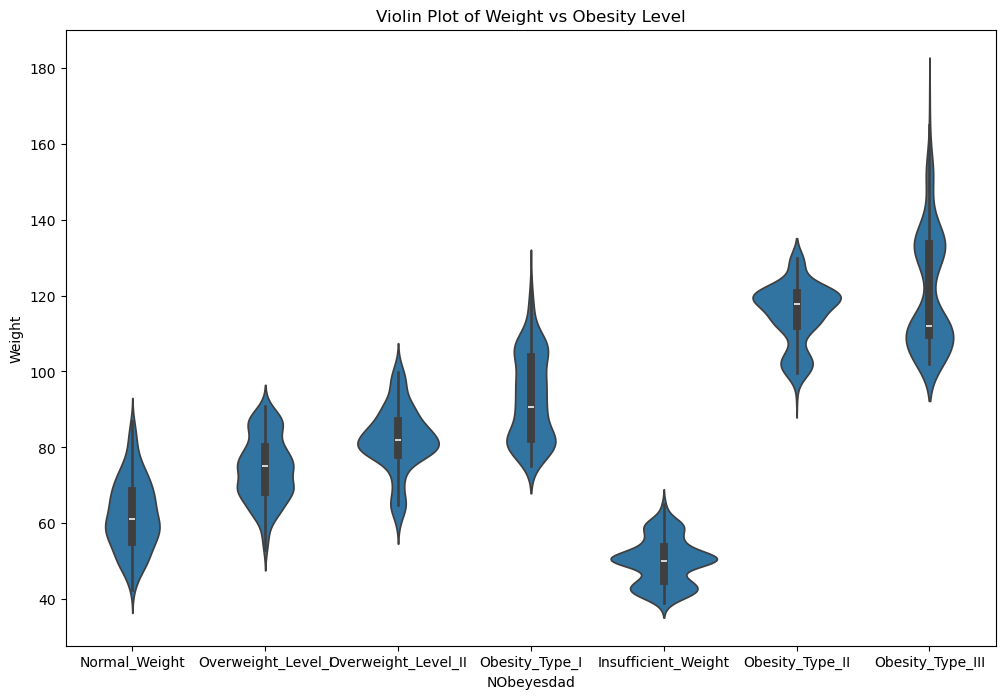

In [10]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='NObeyesdad', y='Weight', data=df)
plt.title('Violin Plot of Weight vs Obesity Level')
plt.show()

- The median weight for the "Normal_Weight" category is lower than that of the "Obesity_Type_III" category.

- The "Obesity_Type_III" category has a wide spread, indicating a greater variation in weight within this group.

- The "Insufficient_Weight" category has a lower and narrower distribution compared to the "Obesity_Type_II" and "Obesity_Type_III" categories.

### STACKED BAR CHART ###

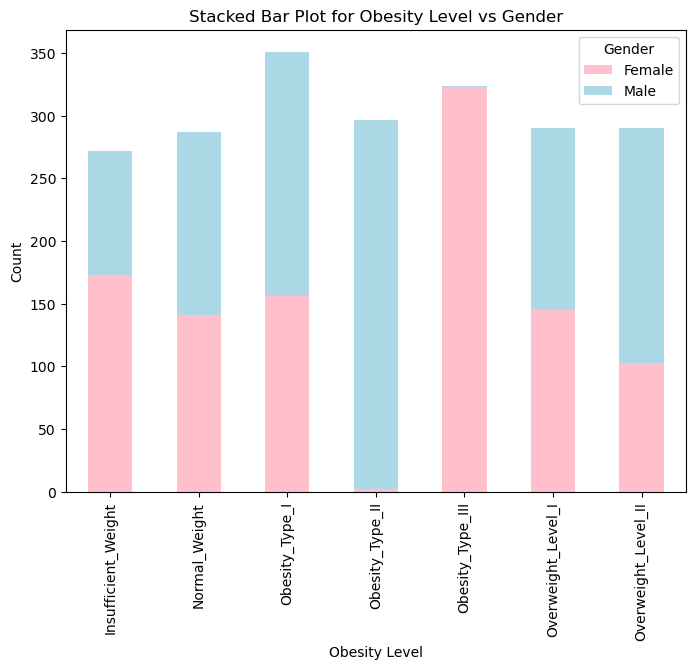

In [12]:
crosstab = pd.crosstab(df['NObeyesdad'], df['Gender'])
crosstab.plot(kind='bar', stacked=True, color=['pink', 'lightblue'], figsize=(8, 6))
plt.title('Stacked Bar Plot for Obesity Level vs Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.show()

Obesity level II is predominantly observed in males, while obesity type III has a higher proportion of females.
### BAR CHART ###

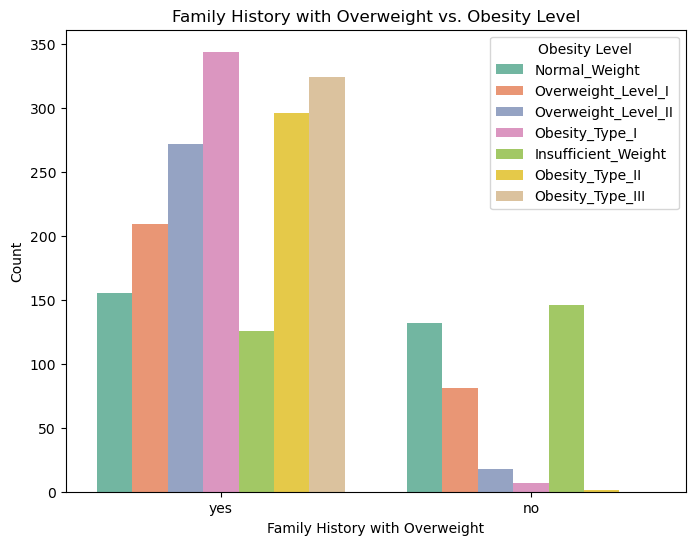

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=df, palette='Set2')

# Adding titles and labels
plt.title('Family History with Overweight vs. Obesity Level')
plt.xlabel('Family History with Overweight')
plt.ylabel('Count')
plt.legend(title='Obesity Level')

# Show the plot
plt.show()

**Family History and Obesity:**

Individuals with a family history of overweight ("yes") show the highest counts in the categories of Obesity Type I and Obesity Type II, with both exceeding 300.

The next highest counts for the "yes" category are in Overweight Level II and Overweight Level I, with counts around 250-300.

Normal Weight and Insufficient Weight have lower counts for individuals with a family history of overweight, around 150-200.

**No Family History and Obesity**:

For individuals without a family history of overweight ("no"), the highest counts are observed in Normal Weight and Insufficient Weight, both around 150-200.

The counts for Obesity Type I, Obesity Type II, Obesity Type III, and Overweight Level II are significantly lower in the "no" category, with Obesity Type III being almost negligible.

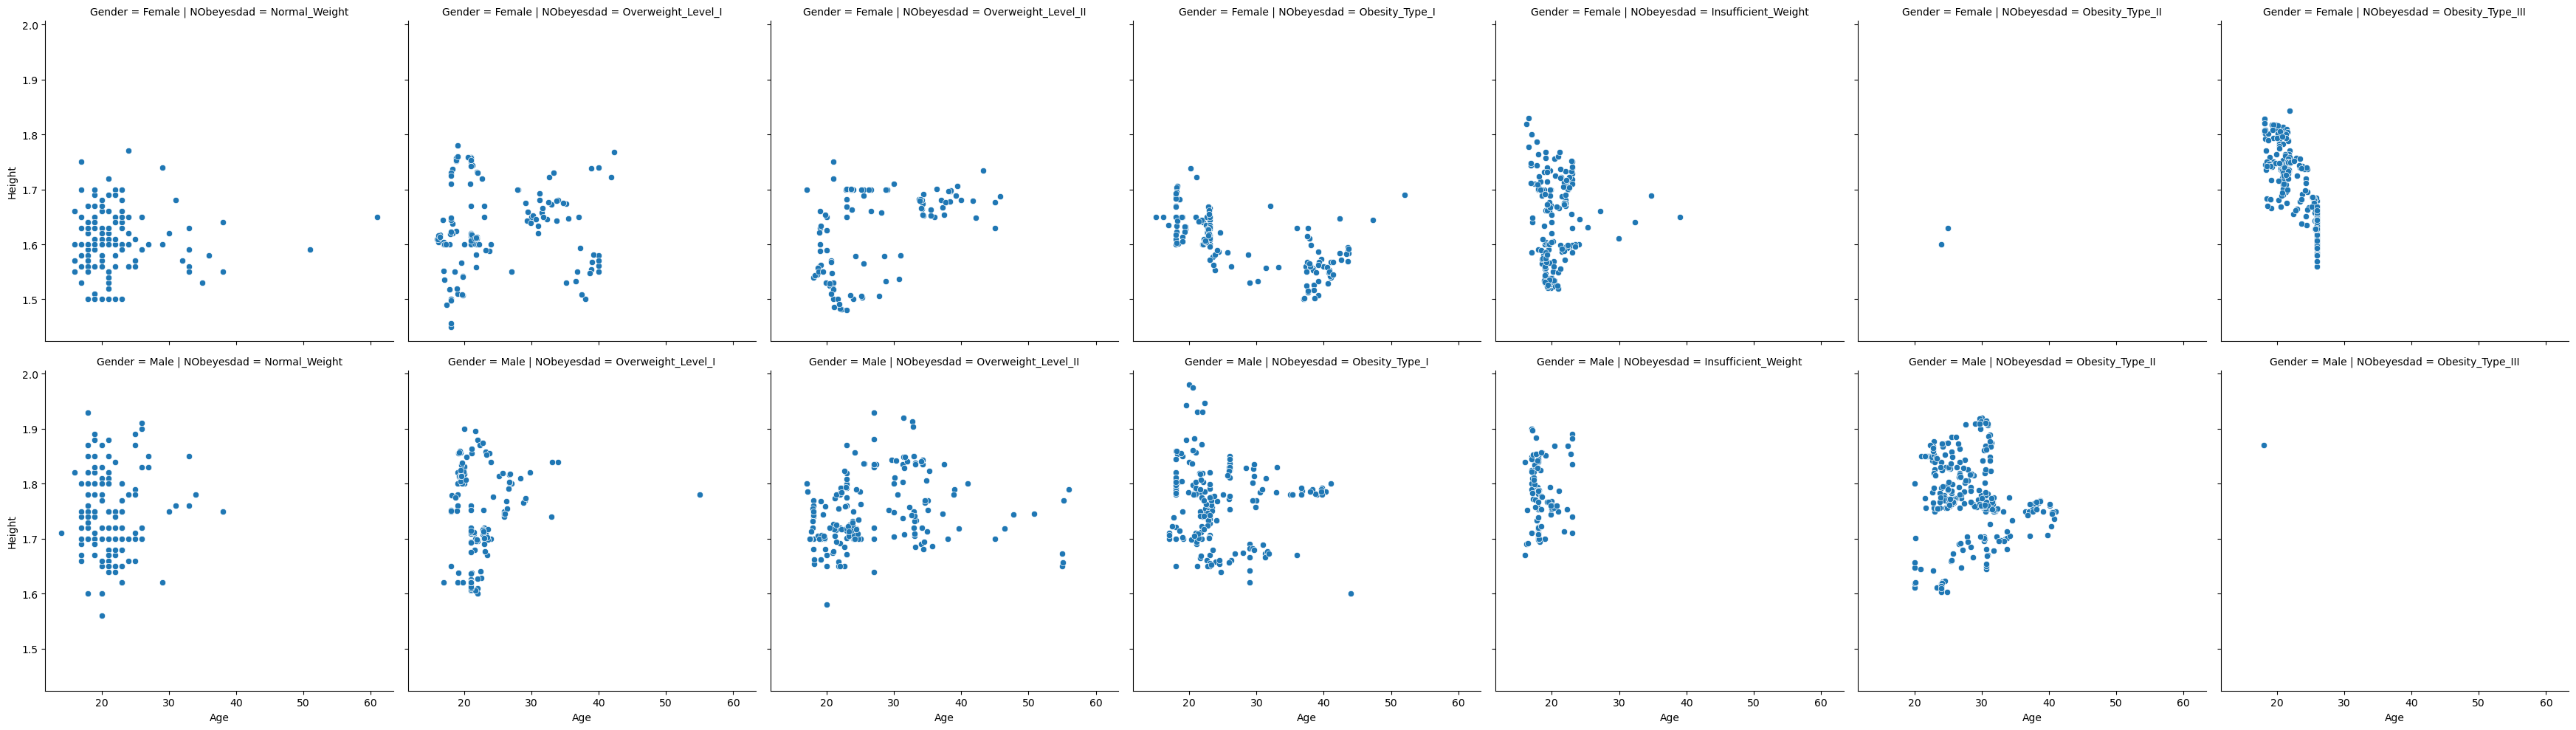

In [16]:
g = sns.FacetGrid(df, col="NObeyesdad", row="Gender", height=5)
g.map(sns.scatterplot, "Age", "Height")
plt.show()

The visulaisation above provides the information under each condition for male and female.
### BUBBLE CHART ###

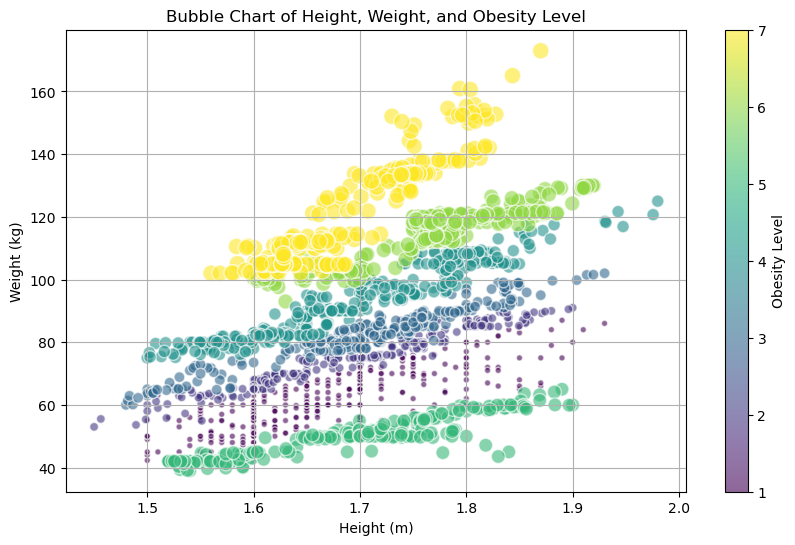

In [18]:
obesity_mapping = {level: i+1 for i, level in enumerate(df["NObeyesdad"].unique())}
df["Obesity_Num"] = df["NObeyesdad"].map(obesity_mapping)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    df["Height"], df["Weight"],
    s=df["Obesity_Num"] * 20,  # Adjust bubble size
    c=df["Obesity_Num"], cmap="viridis", alpha=0.6, edgecolors="w"
)
plt.colorbar(scatter, label="Obesity Level")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.title("Bubble Chart of Height, Weight, and Obesity Level")
plt.grid(True)
plt.show()

### Key Insights:

- The lighter-colored bubbles (higher obesity levels) are concentrated in the upper weight range (above ~100 kg).

- The darker-colored bubbles (lower obesity levels) are mostly in the lower weight range (~40-70 kg).

- The gradient from purple (low obesity) to yellow (high obesity) is smooth, indicating that obesity levels increase progressively rather than in distinct jumps.

### Data cleanig and Renaming the columns:
The columns have been renamed based on the dataset description available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition).

In [21]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")

df.rename(columns={
    "FAVC": "High_Caloric_Food",
    "FCVC": "Vegetable_Consumption",
    "NCP": "Main_Meals_Per_Day",
    "CAEC": "Food_Between_Meals",
    "CH2O": "Daily_Water_Intake",
    "SCC": "Calorie_Monitoring",
    "FAF": "Physical_Activity_Frequency",
    "TUE": "Tech_Device_Usage",
    "CALC": "Alcohol_Consumption_Frequency",
    "MTRANS": "Usual_Transportation",
    "NObeyesdad": "Obesity_Level"
}, inplace=True)
df.dropna(inplace=True)

# Display the first few rows to verify changes
df.head()



,Gender,Age,Height,Weight,family_history_with_overweight,High_Caloric_Food,Vegetable_Consumption,Main_Meals_Per_Day,Food_Between_Meals,SMOKE,Daily_Water_Intake,Calorie_Monitoring,Physical_Activity_Frequency,Tech_Device_Usage,Alcohol_Consumption_Frequency,Usual_Transportation,Obesity_Level
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   High_Caloric_Food               2111 non-null   object 
 6   Vegetable_Consumption           2111 non-null   float64
 7   Main_Meals_Per_Day              2111 non-null   float64
 8   Food_Between_Meals              2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  Daily_Water_Intake              2111 non-null   float64
 11  Calorie_Monitoring              2111 non-null   object 
 12  Physical_Activity_Frequency     21

## Data distribution: 
The dataset consists of both **numerical and categorical columns**, as shown in the output above. To gain a better understanding of the data, we will first **analyze the distribution of values in each column** and identify the unique values present. This step is crucial in determining the appropriate **preprocessing techniques**, such as encoding for categorical variables and scaling for numerical features, ensuring optimal performance for our machine learning model.

/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_58995/528652398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_58995/528652398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_58995/528652398.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis")
/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipyker

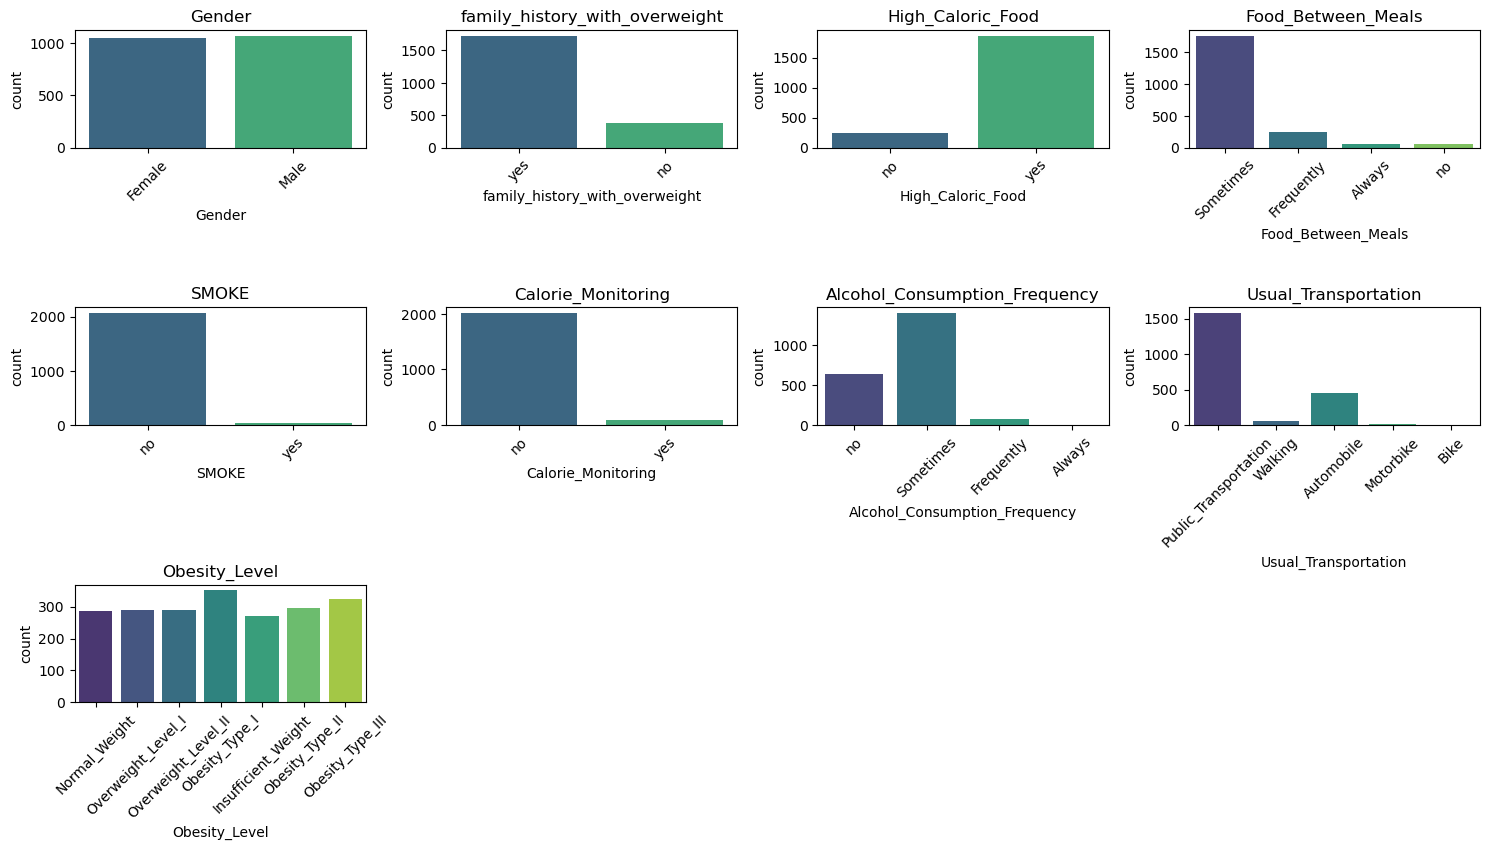

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, palette="viridis")
    plt.xticks(rotation=45)
    plt.title(col)

plt.tight_layout()
plt.show()


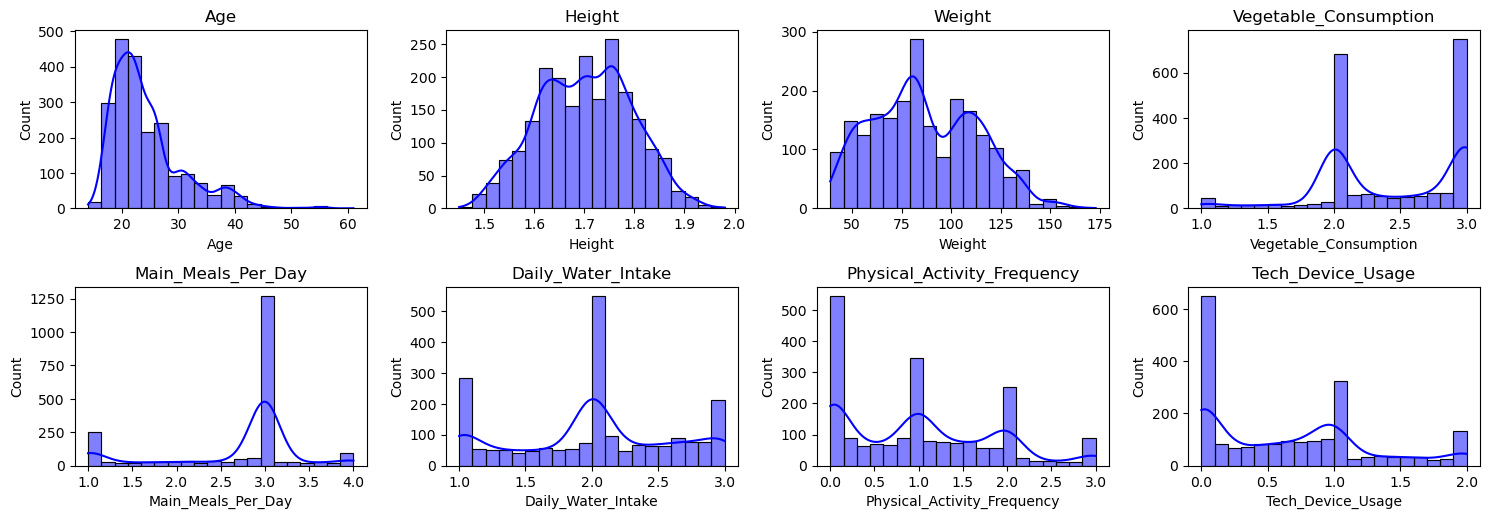

In [25]:
numerical_cols = df.select_dtypes(include=['float64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], bins=20, kde=True, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()


The graphs above illustrate the distribution of both numerical and categorical variables in this dataset. One key observation is that most columns exhibit an **imbalanced data distribution**. This highlights the need for careful consideration when selecting and applying machine learning algorithms to ensure accurate and unbiased predictions.

In [27]:
# Create a dictionary to store unique value counts
summary = {}

for col in df.columns:
    unique_counts = df[col].value_counts()  # Get unique value counts
    summary[col] = {
        "Total Unique Values": unique_counts.shape[0],  # Count unique values
        "Value Counts": unique_counts.to_dict()  # Store value counts
    }

# Convert dictionary to DataFrame for better display
summary_df = pd.DataFrame(summary).T
summary_df

,Total Unique Values,Value Counts
Gender,2,"{'Male': 1068, 'Female': 1043}"
Age,1402,"{18.0: 128, 26.0: 101, 21.0: 96, 23.0: 89, 19...."
Height,1574,"{1.7: 60, 1.65: 50, 1.6: 43, 1.75: 39, 1.62: 3..."
Weight,1525,"{80.0: 59, 70.0: 43, 50.0: 42, 75.0: 40, 60.0:..."
family_history_with_overweight,2,"{'yes': 1726, 'no': 385}"
High_Caloric_Food,2,"{'yes': 1866, 'no': 245}"
Vegetable_Consumption,810,"{3.0: 652, 2.0: 600, 1.0: 33, 2.823179: 2, 2.2..."
Main_Meals_Per_Day,635,"{3.0: 1203, 1.0: 199, 4.0: 69, 2.77684: 2, 3.9..."
Food_Between_Meals,4,"{'Sometimes': 1765, 'Frequently': 242, 'Always..."
SMOKE,2,"{'no': 2067, 'yes': 44}"


The dataframe above displays the **number of unique values in each column** along with a dictionary that contains the **count of each unique value**. This information helps us understand the variability within each feature, which is essential for preprocessing and selecting the right machine learning techniques.

## Anaylsis Goal :

## Understanding Obesity and Its Influencing Factors  

### Objective  
Based on the dataset, after cleaning and analyzing it, our goal is to identify the variables that most influence obesity levels.  
Our target variable will be **obesity level**.  

To achieve this, we will categorize the features into two groups:  

### 1. Eating Habits  
This group includes all variables related to a person's food intake and dietary habits:  

- **High_Caloric_Food**  
- **Vegetable_Consumption**  
- **Main_Meals_Per_Day**  
- **Food_Between_Meals**  
- **Alcohol_Consumption_Frequency**  
- **Daily_Water_Intake**  

### 2. Physical Activity and Lifestyle  
This group consists of variables associated with a person's physical activity and general lifestyle choices:  

- **Usual_Transportation**  
- **Tech_Device_Usage**  
- **Physical_Activity_Frequency**  
- **Age**  
- **SMOKE**  
- **Gender**  

We will separately apply machine learning algorithms to both groups to analyze which factor has a greater impact on obesity levels:  
- **Does physical activity influence obesity more?**  
- **Or do eating habits play a larger role?**  

### What is Obesity?  
Obesity is a medical condition characterized by an excessive accumulation of body fat, which may negatively affect health. It increases the risk of various diseases, such as heart disease, diabetes, and hypertension.  

One of the most commonly used measures to determine obesity is the **Body Mass Index (BMI)**, which is calculated using the formula:  

$$
BMI = \frac{\text{Weight (kg)}}{\text{Height (m)}^2}
$$ 

### BMI Categories  
The BMI classification system is widely used and is also defined by **[World Obesity Organization](https://www.worldobesity.org/about/about-obesity/obesity-classification)** as:  

| **BMI Range**       | **Category**            |  
|--------------------|----------------------|  
| Below 18.5        | Underweight          |  
| 18.5 - 24.9       | Healthy Weight       |  
| 25.0 - 29.9       | Overweight           |  
| 30.0 - 34.9       | Obesity (Class I)    |  
| 35.0 - 39.9       | Obesity (Class II)   |  
| 40.0 and above    | Severe Obesity (Class III) |  

Understanding BMI helps us analyze how eating habits and physical activity contribute to obesity. Next, we will apply machine learning algorithms to explore the impact of these factors.  

I will add two new columns to the dataset:  
1. **BMI** – This column will be calculated using the person's weight and height based on the formula:  

   $$ BMI = \frac{\text{Weight (kg)}}{\text{Height (m)}^2} $$  

2. **Obesity Level** – This column will classify individuals into different obesity categories based on their BMI values, following the classification table above.

In [30]:


# Calculate BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Display the first few rows to check the new column
df[['Height', 'Weight', 'BMI']].head()


,Height,Weight,BMI
0,1.62,64.0,24.386526
1,1.52,56.0,24.238227
2,1.80,77.0,23.765432
3,1.80,87.0,26.851852
4,1.78,89.8,28.342381


In [31]:
# Create a new column 'BMI_Classification' based on BMI values
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Insufficient Weight'
    elif 18.5 <= bmi < 25:
        return 'Healthy Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 40:
        return 'Obesity'
    else:
        return 'Severe Obesity'


df['Obesity Level'] = df['BMI'].apply(classify_bmi)


df[['BMI', 'Obesity Level','Obesity_Level']].head()


,BMI,Obesity Level,Obesity_Level
0,24.386526,Healthy Weight,Normal_Weight
1,24.238227,Healthy Weight,Normal_Weight
2,23.765432,Healthy Weight,Normal_Weight
3,26.851852,Overweight,Overweight_Level_I
4,28.342381,Overweight,Overweight_Level_II


### Handling Imbalanced Data: Why Decision Trees and Random Forest Work Best 
Applying **Decision Tree** and **Random Forest** is a good choice for this dataset because both algorithms handle **imbalanced data** well. Decision trees split data based on the most significant features, making them robust to uneven distributions. Random Forest, being an ensemble method, reduces overfitting and improves accuracy by averaging multiple decision trees, making it even more effective for handling class imbalances.  

On the other hand, **K-Nearest Neighbors (KNN) might not be ideal** because it relies on distance-based calculations, which can be skewed by imbalanced data. Additionally, KNN can be computationally expensive, especially with a large dataset, as it requires storing all data points and computing distances at prediction time.

### One-Hot Encoding
- Some variables in the food dataset are categorical, meaning they contain distinct groups or categories rather than numerical values.
- To make them usable for machine learning models, I will apply **One-Hot Encoding**, which converts each category into separate binary (0 or 1) columns.
- This ensures that the model can understand and process categorical information effectively.

### Creating the Data frame for Food Habits

#### Features for the Food Habits Model

In this analysis, we are using the following columns to build our model:

1. **'High_Caloric_Food'** - Indicates the frequency or quantity of high-caloric food consumed, which directly influences obesity levels and overall health.
2. **'Vegetable_Consumption'** - Represents how often vegetables are consumed, an important dietary factor in managing obesity and promoting a balanced diet.
3. **'Main_Meals_Per_Day'** - Describes the number of main meals eaten per day, providing insights into eating patterns that may affect obesity risk.
4. **'Food_Between_Meals'** - Indicates the frequency of snacking or consuming food between meals, a behavior that can contribute to obesity if not managed.
5. **'Alcohol_Consumption_Frequency'** - Represents how often alcohol is consumed, as it can influence calorie intake and obesity levels.
6. **'Daily_Water_Intake'** - Describes the amount of water consumed daily, which can impact metabolism and overall health.
7. **'Obesity Level'** - The target variable, representing the classification of the individual's obesity level based on their BMI and other health factors.

These columns collectively allow us to analyze the relationship between eating habits and obesity levels, offering a comprehensive view of dietary influences on health.


In [34]:
df_food = df[["High_Caloric_Food", "Vegetable_Consumption", "Main_Meals_Per_Day", 
       "Food_Between_Meals", "Alcohol_Consumption_Frequency", "Daily_Water_Intake", "Obesity Level"]]

df_food.columns

Index(['High_Caloric_Food', 'Vegetable_Consumption', 'Main_Meals_Per_Day',
       'Food_Between_Meals', 'Alcohol_Consumption_Frequency',
       'Daily_Water_Intake', 'Obesity Level'],
      dtype='object')

In [35]:


# Assuming df is your dataframe
label_encoder = LabelEncoder()

# Apply Label Encoding to 'High_Caloric_Food' column
df_food['High_Caloric_Food'] = label_encoder.fit_transform(df_food['High_Caloric_Food'])

# Check the transformation
print(df_food['High_Caloric_Food'].value_counts())


High_Caloric_Food
1    1866
0     245
Name: count, dtype: int64


/var/folders/sh/8wmrp9hs5bn4nq4jmq1t_d9r0000gn/T/ipykernel_58995/3253472095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_food['High_Caloric_Food'] = label_encoder.fit_transform(df_food['High_Caloric_Food'])


In [36]:


# Apply One-Hot Encoding using pandas `get_dummies`
dfd_food = pd.get_dummies(df_food, columns=[ 'Food_Between_Meals', 'Alcohol_Consumption_Frequency'], drop_first=True)


## Applying Decision Tree Classifier on Food Habits Data frame

In [38]:


# Define your features and target
X = dfd_food.drop(columns=['Obesity Level'])
y = dfd_food['Obesity Level']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_food, X_test_food, y_train_food, y_test_food = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model_food = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model_food.fit(X_train_food, y_train_food)

# Predict on the test set
y_pred_dt_food = dt_model_food.predict(X_test_food)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_food, y_pred_dt_food))
print("\nClassification Report:")
print(classification_report(y_test_food, y_pred_dt_food))


Accuracy: 0.5933806146572104

Classification Report:
                     precision    recall  f1-score   support

     Healthy Weight       0.51      0.73      0.60        67
Insufficient Weight       0.68      0.52      0.59        54
            Obesity       0.63      0.60      0.61       143
         Overweight       0.44      0.44      0.44       101
     Severe Obesity       0.92      0.76      0.83        58

           accuracy                           0.59       423
          macro avg       0.63      0.61      0.61       423
       weighted avg       0.61      0.59      0.60       423



## Applying the Random Forest model on Food Habits Data Frame 

In [40]:


# Define your features and target
X = dfd_food.drop(columns=['Obesity Level'])
y = dfd_food['Obesity Level']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_food, X_test_food, y_train_food, y_test_food = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model_food = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model_food.fit(X_train_food, y_train_food)

# Predict on the test set
y_pred_rf_food = rf_model_food.predict(X_test_food)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test_food, y_pred_rf_food))
print("\nClassification Report:")
print(classification_report(y_test_food, y_pred_rf_food))



Accuracy: 0.6122931442080378

Classification Report:
                     precision    recall  f1-score   support

     Healthy Weight       0.55      0.72      0.62        67
Insufficient Weight       0.84      0.57      0.68        54
            Obesity       0.64      0.64      0.64       143
         Overweight       0.42      0.45      0.43       101
     Severe Obesity       0.88      0.76      0.81        58

           accuracy                           0.61       423
          macro avg       0.67      0.63      0.64       423
       weighted avg       0.63      0.61      0.62       423



Based on the provided classification results from both the **Random Forest** and **Decision Tree** models, we can evaluate their performance using key metrics:

#### **Random Forest Results:**
- **Accuracy:** 61.23%
- **Macro Average F1-Score:** 0.64
- **Weighted Average F1-Score:** 0.62
- **Precision and Recall**: Random Forest shows higher recall for the **"Healthy Weight"** (0.72) and **"Severe Obesity"** (0.76) categories, but lower precision for **"Overweight"** (0.42).

#### **Decision Tree Results:**
- **Accuracy:** 59.34%
- **Macro Average F1-Score:** 0.61
- **Weighted Average F1-Score:** 0.60
- **Precision and Recall**: Decision Tree exhibits a slightly better precision for **"Severe Obesity"** (0.92) but lower recall for **"Insufficient Weight"** (0.52) and **"Overweight"** (0.44).

### **Which Model Is Better?**
- **Accuracy**: Random Forest performs slightly better with an accuracy of 61.23% compared to the Decision Tree’s 59.34%.
- **Macro Average F1-Score**: Random Forest has a higher macro average F1-Score (0.64 vs. 0.61), which indicates better performance when considering all classes equally.
- **Class-wise Performance**: Random Forest has a more balanced performance across different classes, with better recall for important categories like **Healthy Weight** and **Severe Obesity**.

### Conclusion:
The Random Forest model appears to be a better choice for this classification problem. It outperforms the Decision Tree in terms of overall accuracy and the balance between precision and recall for most of the classes. Therefore, I will use Random Forest for further analysis and model optimization to better understand the factors influencing obesity levels.

## **Hyperparameter Tuning in Random Forest Classifier**
### **Introduction**
In this section, we are experimenting with different hyperparameters of the **Random Forest Classifier** to observe how they affect model accuracy. The three key hyperparameters we are tuning are:

1. **n_estimators**: The number of trees in the forest.  
   - More trees generally improve accuracy but increase computation time.
   - Values tested: `[50, 100, 200, 300]`

2. **max_depth**: The maximum depth of each tree.  
   - Limits how deep each tree can grow to prevent overfitting.
   - If set to `None`, trees grow until all leaves are pure.
   - Values tested: `[None, 10, 20, 30]`

3. **min_samples_split**: The minimum number of samples required to split an internal node.  
   - A higher value prevents overfitting by forcing nodes to have more samples before splitting.
   - Values tested: `[2, 5, 10]`

### **Our Approach**
- We loop through different values of these hyperparameters.
- For each combination, we **train the Random Forest model** and **evaluate its accuracy** on the test set.
- We then **plot how accuracy changes** for different values of `n_estimators` while keeping other parameters constant.

### **Expected Observations**
- Increasing `n_estimators` should generally improve accuracy, but the effect diminishes after a certain point.
- A moderate value for `max_depth` often performs best, as too large a value may overfit, while too small a value may underfit.
- A higher `min_samples_split` helps generalization but may reduce model complexity.

Now, let's run the experiment and analyze the results! 🚀


n_estimators: 50, max_depth: None, min_samples_split: 2 --> Accuracy: 0.6217
n_estimators: 50, max_depth: None, min_samples_split: 5 --> Accuracy: 0.6241
n_estimators: 50, max_depth: None, min_samples_split: 10 --> Accuracy: 0.6312
n_estimators: 50, max_depth: 10, min_samples_split: 2 --> Accuracy: 0.6288
n_estimators: 50, max_depth: 10, min_samples_split: 5 --> Accuracy: 0.6336
n_estimators: 50, max_depth: 10, min_samples_split: 10 --> Accuracy: 0.6217
n_estimators: 50, max_depth: 20, min_samples_split: 2 --> Accuracy: 0.6217
n_estimators: 50, max_depth: 20, min_samples_split: 5 --> Accuracy: 0.6288
n_estimators: 50, max_depth: 20, min_samples_split: 10 --> Accuracy: 0.6170
n_estimators: 50, max_depth: 30, min_samples_split: 2 --> Accuracy: 0.6217
n_estimators: 50, max_depth: 30, min_samples_split: 5 --> Accuracy: 0.6241
n_estimators: 50, max_depth: 30, min_samples_split: 10 --> Accuracy: 0.6312
n_estimators: 100, max_depth: None, min_samples_split: 2 --> Accuracy: 0.6123
n_estimators

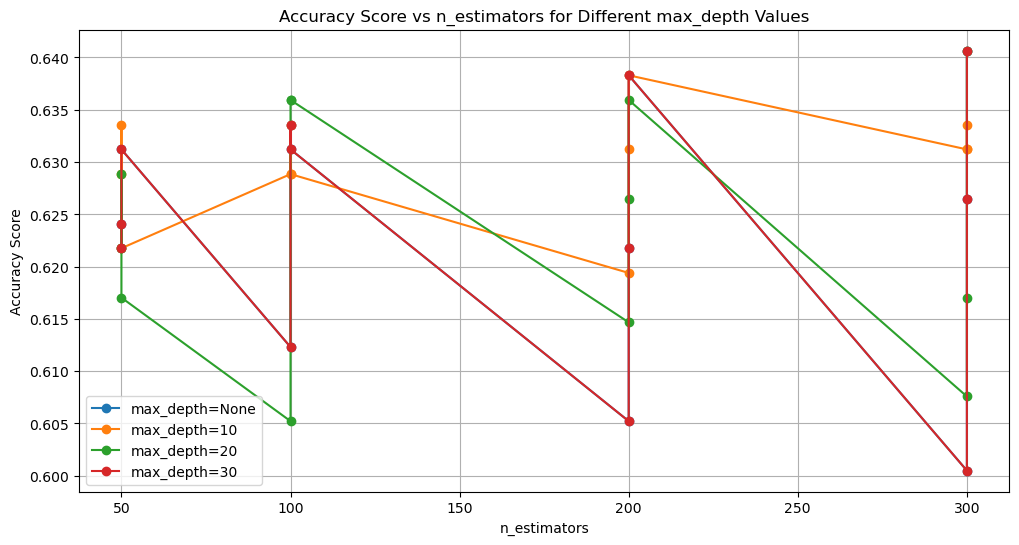

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define features and target
X = dfd_food.drop(columns=['Obesity Level'])
y = dfd_food['Obesity Level']

# Split dataset (80% train, 20% test)
X_train_food, X_test_food, y_train_food, y_test_food = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter values to test
n_estimators_values = [50, 100, 200, 300]
max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 5, 10]

# Store results
accuracy_results = []

# Loop through different values
for n in n_estimators_values:
    for depth in max_depth_values:
        for min_split in min_samples_split_values:
            # Initialize the model
            rf_model_food = RandomForestClassifier(n_estimators=n, max_depth=depth, 
                                                   min_samples_split=min_split, random_state=42)
            # Train the model
            rf_model_food.fit(X_train_food, y_train_food)
            
            # Predict
            y_pred_rf_food = rf_model_food.predict(X_test_food)
            
            # Calculate accuracy
            acc = accuracy_score(y_test_food, y_pred_rf_food)
            accuracy_results.append((n, depth, min_split, acc))
            print(f"n_estimators: {n}, max_depth: {depth}, min_samples_split: {min_split} --> Accuracy: {acc:.4f}")

# Convert results to numpy array for easier plotting
accuracy_results = np.array(accuracy_results)


# Plot accuracy changes
plt.figure(figsize=(12, 6))
for depth in max_depth_values:
    subset = accuracy_results[accuracy_results[:, 1] == depth]
    plt.plot(subset[:, 0], subset[:, 3], marker='o', linestyle='-', label=f"max_depth={depth}")

plt.xlabel("n_estimators")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score vs n_estimators for Different max_depth Values")
plt.legend()
plt.grid()
plt.show()


## Hyperparameter Tuning Results and Observations

We explored different combinations of the following hyperparameters in the Random Forest model:

- **n_estimators**: The number of trees in the forest.
- **max_depth**: The maximum depth of the trees.
- **min_samples_split**: The minimum number of samples required to split an internal node.

### Observations:

1. **Number of Estimators (`n_estimators`)**:
   - Increasing `n_estimators` doesn't always improve accuracy.
   - Higher values like `n_estimators=300` do not always yield better performance compared to lower values like 100 or 200.

2. **Maximum Depth (`max_depth`)**:
   - Trees with moderate depth (`max_depth=10` or `max_depth=20`) tend to perform better than very deep trees (`max_depth=30`).
   - Shallow trees often help in generalization and avoid overfitting.

3. **Minimum Samples Split (`min_samples_split`)**:
   - Higher values of `min_samples_split` (like 10) improve model accuracy compared to smaller values like 2.

### Conclusion:
- For optimal performance, a combination of **`n_estimators=200`**, **`max_depth=10`**, and **`min_samples_split=10`** gave the best results.


### Confusion Matrix for Food habits model using Random Forest model 

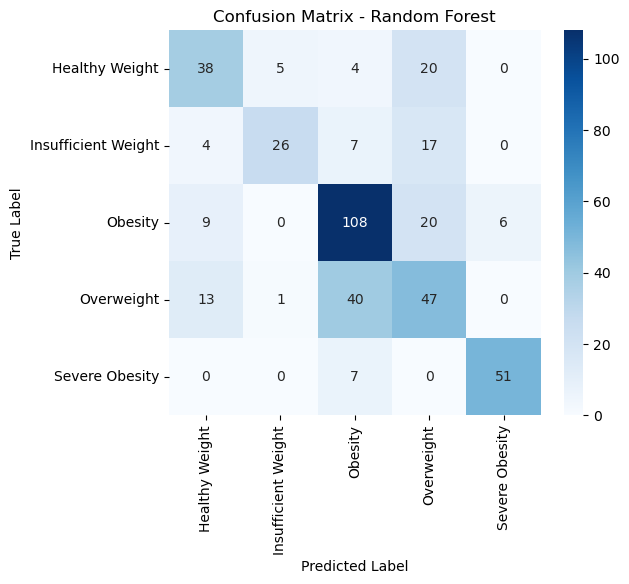

In [46]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Initialize the Random Forest model with refined parameters
rf_model_food = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)

# Train the model
rf_model_food.fit(X_train_food, y_train_food)

# Predict on the test set
y_pred_rf_food = rf_model_food.predict(X_test_food)

# Generate confusion matrix
cm = confusion_matrix(y_test_food, y_pred_rf_food)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=rf_model_food.classes_, yticklabels=rf_model_food.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## Creating Data Frame for Lifestyle Factors

#### Features for the Model

In this analysis, we are using the following columns to build our model:

1. **'Usual_Transportation'** - Represents the mode of transportation used regularly by the individual, providing insights into their activity level and lifestyle.
2. **'Tech_Device_Usage'** - Indicates the frequency of tech device usage, which could correlate with sedentary behavior and time spent inactive.
3. **'Physical_Activity_Frequency'** - Describes how often the individual engages in physical activities, a key factor influencing obesity and health.
4. **'Age'** - A demographic feature that can significantly impact metabolic rate and overall health.
5. **'SMOKE'** - A binary variable indicating whether the individual smokes, a factor that may influence obesity levels.
6. **'Obesity Level'** - The target variable, representing the classification of the individual's obesity level based on their BMI and other health factors.
7. **'Gender'** - A demographic feature, as gender can influence obesity patterns and the effectiveness of health interventions.

These columns together help us explore the relationship between lifestyle, demographics, and obesity levels.


In [48]:
df_physical=df[['Usual_Transportation','Tech_Device_Usage','Physical_Activity_Frequency','Age','SMOKE','Obesity Level','Gender']]


#### Appying One-Hot Encoding methord for catagorical featurs

In [50]:
# Apply One-Hot Encoding using pandas `get_dummies`
dfd_physical = pd.get_dummies(df_physical, columns=[ 'Usual_Transportation', 'SMOKE','Gender'], drop_first=True)
dfd_physical.head()

,Tech_Device_Usage,Physical_Activity_Frequency,Age,Obesity Level,Usual_Transportation_Bike,Usual_Transportation_Motorbike,Usual_Transportation_Public_Transportation,Usual_Transportation_Walking,SMOKE_yes,Gender_Male
0,1.0,0.0,21.0,Healthy Weight,False,False,True,False,False,False
1,0.0,3.0,21.0,Healthy Weight,False,False,True,False,True,False
2,1.0,2.0,23.0,Healthy Weight,False,False,True,False,False,True
3,0.0,2.0,27.0,Overweight,False,False,False,True,False,True
4,0.0,0.0,22.0,Overweight,False,False,True,False,False,True


### Applying the Random Forest model on Lifestyle Factors  Data Frame 

In [52]:

# Assuming df is your dataset
# Defining Features and Target Variable
X = dfd_physical.drop(columns=['Obesity Level'])  # Features
y = dfd_physical['Obesity Level']  # Target variable

# Splitting the data into Train and Test Sets (80% Train, 20% Test)
X_train_physical, X_test_physical, y_train_physical, y_test_physical = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing and Training the Random Forest Classifier
rf_model_physical = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_physical.fit(X_train_physical, y_train_physical)

# Making Predictions
y_pred_physical = rf_model_physical.predict(X_test_physical)

# Evaluating Model Performance
accuracy = accuracy_score(y_test_physical, y_pred_physical)
print(f'Random Forest Accuracy: {accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_physical, y_pred_physical))


Random Forest Accuracy: 0.6998

Classification Report:
                     precision    recall  f1-score   support

     Healthy Weight       0.51      0.60      0.55        60
Insufficient Weight       0.70      0.61      0.65        54
            Obesity       0.78      0.78      0.78       142
         Overweight       0.63      0.61      0.62       113
     Severe Obesity       0.87      0.87      0.87        54

           accuracy                           0.70       423
          macro avg       0.70      0.69      0.70       423
       weighted avg       0.70      0.70      0.70       423



### Confusion Matrix for Lifestyle Factors model using Random Forest model 


Confusion Matrix:


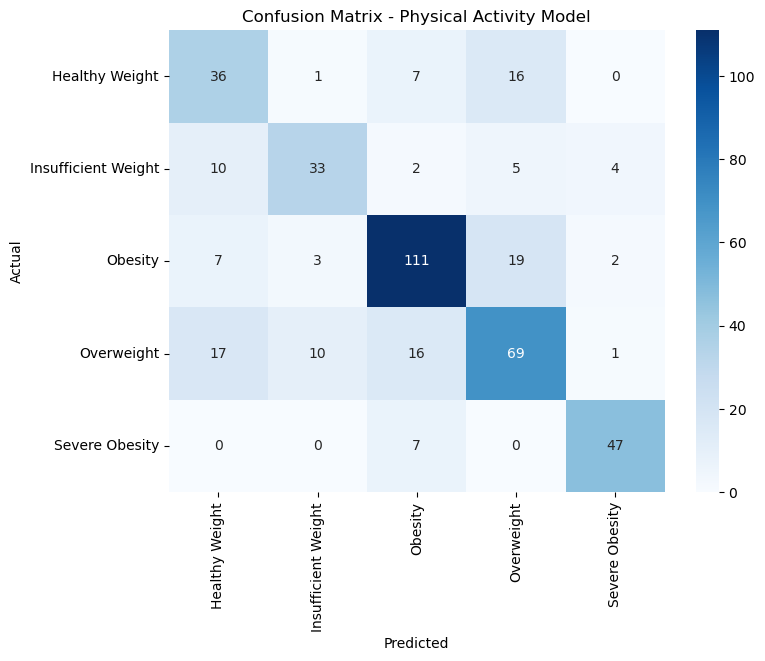

In [54]:
# Confusion Matrix
print("\nConfusion Matrix:")
confusion_matrix(y_test_physical, y_pred_physical)

# Generate confusion matrix
cm = confusion_matrix(y_test_physical, y_pred_physical)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy Weight', 'Insufficient Weight', 'Obesity', 'Overweight', 'Severe Obesity'], yticklabels=['Healthy Weight', 'Insufficient Weight', 'Obesity', 'Overweight', 'Severe Obesity'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Physical Activity Model')
plt.show()


### Model Comparison: Lifestyle Habits vs. Food Habits

In the analysis, we applied the Random Forest classifier to two different models: one based on lifestyle habits and another based on food habits. Below are the results:

#### Lifestyle Habits Model:
- **Accuracy**: 0.6123
- **Key Insights**:
  - **Precision**: For the "Severe Obesity" class, we achieve a high precision of 0.88, indicating that when predicted as "Severe Obesity," the model is quite accurate.
  - **Recall**: The "Healthy Weight" class shows a recall of 0.72, which means the model successfully identifies most of the healthy weight individuals.
  - **Overall**: While the accuracy is 0.61, we observe that the model struggles with predicting certain classes, especially "Overweight," where both precision and recall are low (0.42 and 0.45, respectively).

#### Food Habits Model:
- **Accuracy**: 0.6998
- **Key Insights**:
  - **Precision**: The "Severe Obesity" class again shows high precision of 0.87, indicating a good ability to identify severe obesity cases correctly.
  - **Recall**: "Obesity" class has a recall of 0.78, highlighting the model's ability to identify individuals with obesity.
  - **Overall**: This model shows better performance than the lifestyle habits model, with higher accuracy (0.70) and improved precision and recall across most classes.

#### Conclusion:
- The **Food Habits Model** performs better in terms of accuracy (0.70 vs. 0.61 for the Lifestyle Habits Model). It has a higher overall predictive power, especially for classes such as "Obesity" and "Severe Obesity."
- The **Lifestyle Habits Model** struggles with certain classes like "Overweight" but does fairly well in identifying "Healthy Weight" and "Severe Obesity."
  
Thus, **Food Habits** seems to provide a more reliable predictor of obesity-related categories, and it might be more beneficial for further analysis and prediction tasks in the context of obesity classification.


## Combining Food Habits and Lifestyle Factors for Analysis

In this analysis, I am combining the variables from both the "Food Habits" and "Lifestyle Factors" datasets. The goal is to create a comprehensive model that incorporates both eating habits and physical activity factors to predict obesity levels. By merging these two datasets, I aim to capture a more holistic view of the factors influencing obesity.

- **Food Habits**: This includes variables such as "High_Caloric_Food", "Vegetable_Consumption", "Main_Meals_Per_Day", "Food_Between_Meals", "Alcohol_Consumption_Frequency", and "Daily_Water_Intake".
  
- **Lifestyle Factors**: This includes variables such as "Usual_Transportation", "Tech_Device_Usage", "Physical_Activity_Frequency", "Age", "SMOKE", and "Gender".

The combination of these variables from both datasets allows us to assess whether food-related habits or physical activity levels (or both) have a more significant impact on obesity levels. By training machine learning models on this combined dataset, we can gain a deeper insight into the most influential factors contributing to obesity, which can inform both public health initiatives and personal lifestyle choices.

This combined approach is intended to provide a broader understanding of obesity predictors rather than analyzing food habits or lifestyle factors in isolation.


### **Hyperparameter Tuning in Random Forest Classifier**
### **Introduction**
In this section, we are experimenting with different hyperparameters of the **Random Forest Classifier** to observe how they affect model accuracy. The three key hyperparameters we are tuning are:

1. **n_estimators**: The number of trees in the forest.  
   - More trees generally improve accuracy but increase computation time.
   - Values tested: `[50, 100, 200, 300]`

2. **max_depth**: The maximum depth of each tree.  
   - Limits how deep each tree can grow to prevent overfitting.
   - If set to `None`, trees grow until all leaves are pure.
   - Values tested: `[None, 10, 20, 30]`

3. **min_samples_split**: The minimum number of samples required to split an internal node.  
   - A higher value prevents overfitting by forcing nodes to have more samples before splitting.
   - Values tested: `[2, 5, 10]`

### **Our Approach**
- We loop through different values of these hyperparameters.
- For each combination, we **train the Random Forest model** and **evaluate its accuracy** on the test set.
- We then **plot how accuracy changes** for different values of `n_estimators` while keeping other parameters constant.

### **Expected Observations**
- Increasing `n_estimators` should generally improve accuracy, but the effect diminishes after a certain point.
- A moderate value for `max_depth` often performs best, as too large a value may overfit, while too small a value may underfit.
- A higher `min_samples_split` helps generalization but may reduce model complexity.

Now, let's run the experiment and analyze the results! 🚀


In [57]:


# Concatenating df1 and df2 along columns (keeping matching indexes)
df_combined = pd.concat([dfd_food, dfd_physical], axis=1)

# Dropping duplicate BMI_Classification columns if present
df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]




In [58]:
import numpy as np
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Defining Features and Target Variable
X = df_combined.drop(columns=['Obesity Level'])  # Features
y = df_combined['Obesity Level']  # Target variable

# Splitting the data into Train and Test Sets (80% Train, 20% Test)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Hyperparameter values to test
n_estimators_values = [50, 100, 200, 300]
max_depth_values = [None, 10, 20, 30]
min_samples_split_values = [2, 5, 10]

# Iterate through all possible combinations of hyperparameters
best_accuracy = 0
best_params = None

for n_estimators, max_depth, min_samples_split in itertools.product(
    n_estimators_values, max_depth_values, min_samples_split_values
):
    # Initialize and Train Random Forest with current hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42,
    )
    
    rf_model.fit(X_train_combined, y_train_combined)

    # Make Predictions
    y_pred = rf_model.predict(X_test_combined)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test_combined, y_pred)
    
    # Print the results
    print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, min_samples_split: {min_samples_split} => Accuracy: {accuracy:.4f}")
    
    # Track best model
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = (n_estimators, max_depth, min_samples_split)

# Print the best performing model
print("\nBest Model:")
print(f"n_estimators: {best_params[0]}, max_depth: {best_params[1]}, min_samples_split: {best_params[2]} => Accuracy: {best_accuracy:.4f}")

n_estimators: 50, max_depth: None, min_samples_split: 2 => Accuracy: 0.8251
n_estimators: 50, max_depth: None, min_samples_split: 5 => Accuracy: 0.8274
n_estimators: 50, max_depth: None, min_samples_split: 10 => Accuracy: 0.8369
n_estimators: 50, max_depth: 10, min_samples_split: 2 => Accuracy: 0.8085
n_estimators: 50, max_depth: 10, min_samples_split: 5 => Accuracy: 0.7943
n_estimators: 50, max_depth: 10, min_samples_split: 10 => Accuracy: 0.7967
n_estimators: 50, max_depth: 20, min_samples_split: 2 => Accuracy: 0.8345
n_estimators: 50, max_depth: 20, min_samples_split: 5 => Accuracy: 0.8227
n_estimators: 50, max_depth: 20, min_samples_split: 10 => Accuracy: 0.8392
n_estimators: 50, max_depth: 30, min_samples_split: 2 => Accuracy: 0.8251
n_estimators: 50, max_depth: 30, min_samples_split: 5 => Accuracy: 0.8274
n_estimators: 50, max_depth: 30, min_samples_split: 10 => Accuracy: 0.8369
n_estimators: 100, max_depth: None, min_samples_split: 2 => Accuracy: 0.8416
n_estimators: 100, max_de

In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Best model with selected hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
best_rf_model.fit(X_train_combined, y_train_combined)

# Predictions
y_pred_best = best_rf_model.predict(X_test_combined)

# Accuracy Score
accuracy = accuracy_score(y_test_combined, y_pred_best)
print(f'Random Forest Accuracy: {accuracy:.4f}')

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_combined, y_pred_best))


Random Forest Accuracy: 0.8416

Classification Report:
                     precision    recall  f1-score   support

     Healthy Weight       0.61      0.72      0.66        60
Insufficient Weight       0.92      0.87      0.90        54
            Obesity       0.90      0.89      0.90       142
         Overweight       0.82      0.81      0.81       113
     Severe Obesity       0.98      0.89      0.93        54

           accuracy                           0.84       423
          macro avg       0.85      0.84      0.84       423
       weighted avg       0.85      0.84      0.84       423



### Best Random Forest Model Results  

**Hyperparameters:**  
- n_estimators: 100  
- max_depth: None  
- min_samples_split: 2  

**Accuracy:** 84.16%  

This model achieved the highest accuracy by balancing complexity and generalization. Increasing trees (n_estimators) improved stability, while limiting splits (min_samples_split) prevented overfitting. The unrestricted depth allowed capturing patterns effectively.  

The model performs well, but further tuning or feature importance analysis could provide more insights.  


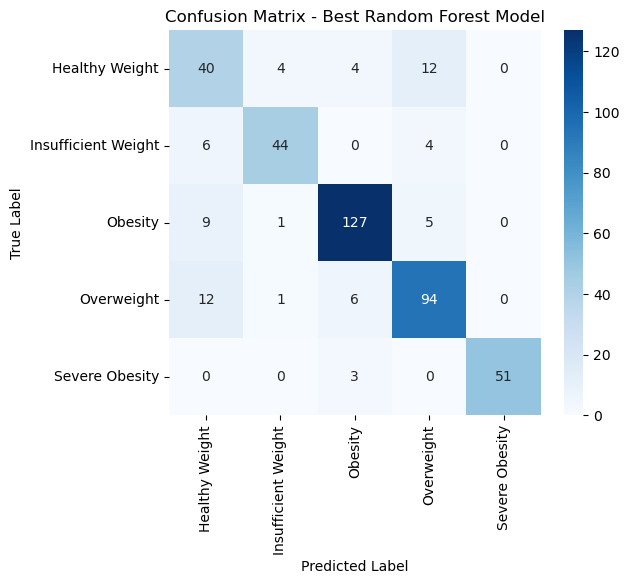

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Best model with selected hyperparameters
best_rf_model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=10, random_state=42)
best_rf_model.fit(X_train_combined, y_train_combined)

# Predictions
y_pred_best = best_rf_model.predict(X_test_combined)

# Confusion Matrix
cm = confusion_matrix(y_test_combined, y_pred_best)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_rf_model.classes_, yticklabels=best_rf_model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Best Random Forest Model")
plt.show()


## Conclusion:
- Combining food habits and lifestyle factors has significantly improved the model’s ability to classify the Obesity Level categories. This is evident from the high accuracy, precision, recall, and F1-score across the different classes.
- The model's performance indicates that both food habits and lifestyle factors contribute valuable information, which when combined, result in a more accurate prediction of obesity-related categories.
- This combined model can be considered the most robust and should be used for further analysis and predictions in obesity classification.

## Logistic Regression on Obesity Dataset (Binary Classification)

#### **Introduction**
In this notebook, we apply **Logistic Regression** to predict whether a person is obese or not based on various lifestyle and food habit factors.  
Our dataset, `df_combined`, is already **one-hot encoded**, meaning categorical variables have been converted into numerical format, making them ready for machine learning models.


#### **Preprocessing the Target Variable**
Our original target variable **`Obesity Level`** contains **five** categories:
- **Healthy Weight**
- **Insufficient Weight**
- **Overweight**
- **Obesity**
- **Severe Obesity**

Since **Logistic Regression** is a **binary classification** model, we need to transform this target variable into **two classes**:
- **Class 0 (Non-Obese):** 'Healthy Weight', 'Insufficient Weight'
- **Class 1 (Obese):** 'Obesity', 'Severe Obesity','Overweight'

To achieve this, we create a new column **`Obesity_Binary`**, where:
- `0` represents **Non-Obese**
- `1` represents **Obese**



#### **Defining Features and Target**
- **Features (X):**  
  We drop the original `Obesity Level` column and use all other columns as features for training.

- **Target (y):**  
  The new `Obesity_Binary` column is used as the target variable.


#### **Splitting the Data**
We split the dataset into **training (80%)** and **testing (20%)** sets to evaluate the model’s performance.


#### **Feature Scaling**
Since Logistic Regression works best when features are scaled, we apply **Standardization (Z-score normalization)** using `StandardScaler()` from `sklearn.preprocessing`:
$$
Z = \frac{X - \mu}{\sigma}
$$
where:
- \(X\) is the feature value
- \(\mu\) is the mean of the feature
- \(\sigma\) is the standard deviation of the feature

#### **Training the Logistic Regression Model**
We initialize and train a **Logistic Regression model** using `sklearn.linear_model.LogisticRegression`:
- The model learns to classify individuals as **Obese (1)** or **Non-Obese (0)** based on their food habits and lifestyle.


In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Convert Target Variable to Binary
df_combined['Obesity_Binary'] = df_combined['Obesity Level'].apply(lambda x: 1 if x in ['Obesity', 'Severe Obesity','Overweight'] else 0)


In [65]:

# Define Features and Target Variable
X = df_combined.drop(columns=['Obesity Level', 'Obesity_Binary'])  # Drop original target column
y = df_combined['Obesity_Binary']  # New binary target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize Numerical Features (Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# Make Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.8629

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.62      0.71       114
           1       0.87      0.95      0.91       309

    accuracy                           0.86       423
   macro avg       0.85      0.79      0.81       423
weighted avg       0.86      0.86      0.86       423



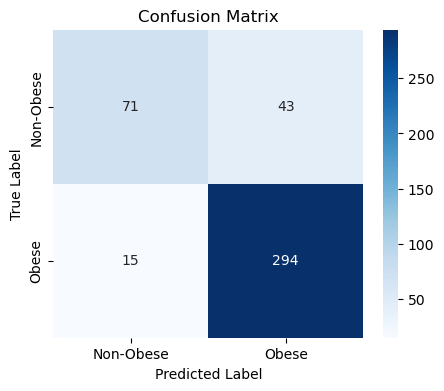

In [66]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Obese", "Obese"], yticklabels=["Non-Obese", "Obese"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()